In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.feature_extraction.image import PatchExtractor

from sparse_coding import model, inference
from imp import reload

In [2]:
ims = np.transpose(loadmat('IMAGES.mat')['IMAGES'], (2, 0, 1))

In [3]:
patch_size = (8, 8)
n_feat = np.prod(patch_size)
X = PatchExtractor(patch_size, max_patches=500, random_state=0).transform(ims)
X = X.reshape(X.shape[0], -1)

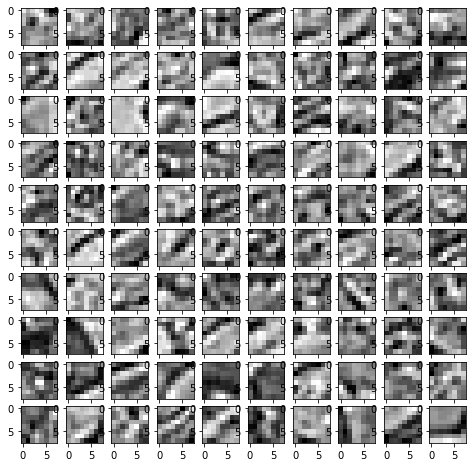

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for ii, ax in enumerate(axes.ravel()):
    ax.imshow(X[ii].reshape(*patch_size), cmap='gray')

In [5]:
m = model.SparseCoding(128, device='cuda', dtype=torch.float32, learn_method='bfgs', infer_method='lca')

In [6]:
m.fit(X)

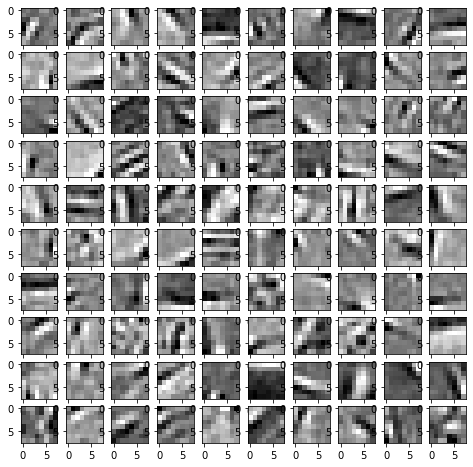

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for ii, ax in enumerate(axes.ravel()):
    ax.imshow(m.D[ii].reshape(patch_size), cmap='gray')